In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from model import get_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import helpers as hp

In [2]:
commands, nums = hp.get_commands_dict('commands.csv')

In [3]:
data = np.load('data/data.npy')
labels = np.load('data/labels.npy')
assert data.shape[0] == labels.shape[0]
labels = [hp.get_num_by_command(label, commands) for label in labels] 
labels = to_categorical(labels, num_classes=11)
idx = np.random.permutation(data.shape[0])
data, labels = data[idx], labels[idx]

test_size = 0.3

dataset_size = data.shape[0]
train_data = data[:np.floor(dataset_size*(1-test_size)).astype(int), ...]
train_labels = labels[:np.floor(dataset_size*(1-test_size)).astype(int), ...]
test_data = data[np.floor(dataset_size*(1-test_size)).astype(int):, ...]
test_labels = labels[np.floor(dataset_size*(1-test_size)).astype(int):, ...]

print(f'Train data shape : {train_data.shape}')
print(f'Train labels shape : {train_labels.shape}')
print(f'Test data shape : {test_data.shape}')
print(f'Test labels shape : {test_labels.shape}')

Train data shape : (385, 400, 13)
Train labels shape : (385, 11)
Test data shape : (165, 400, 13)
Test labels shape : (165, 11)


In [4]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 5200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1331456   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 11)                715       
Total params: 1,389,835
Trainable params: 1,389,835
Non-trainable params: 0
______________________________________________

In [5]:
# Compile model

model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [6]:
# Set checkpoints

checkpoint_best_only = ModelCheckpoint(save_freq="epoch", save_best_only=True,
                                       filepath="model_checkpoints/mlp/best_only") 
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [7]:
# Train the model

history = model.fit(train_data, train_labels, epochs=50, batch_size=256, validation_split=0.15, 
                    callbacks=[early_stopping, checkpoint_best_only], 
                    verbose=2)

Epoch 1/50
2/2 - 2s - loss: 6.9315 - accuracy: 0.0856 - val_loss: 2.7985 - val_accuracy: 0.1724
INFO:tensorflow:Assets written to: model_checkpoints/mlp\best_only\assets
Epoch 2/50
2/2 - 0s - loss: 2.3952 - accuracy: 0.2294 - val_loss: 1.7601 - val_accuracy: 0.4655
INFO:tensorflow:Assets written to: model_checkpoints/mlp\best_only\assets
Epoch 3/50
2/2 - 0s - loss: 1.5623 - accuracy: 0.4740 - val_loss: 1.5299 - val_accuracy: 0.5517
INFO:tensorflow:Assets written to: model_checkpoints/mlp\best_only\assets
Epoch 4/50
2/2 - 0s - loss: 1.1391 - accuracy: 0.5994 - val_loss: 1.1256 - val_accuracy: 0.7241
INFO:tensorflow:Assets written to: model_checkpoints/mlp\best_only\assets
Epoch 5/50
2/2 - 0s - loss: 0.7502 - accuracy: 0.7859 - val_loss: 1.0547 - val_accuracy: 0.7241
INFO:tensorflow:Assets written to: model_checkpoints/mlp\best_only\assets
Epoch 6/50
2/2 - 0s - loss: 0.5511 - accuracy: 0.8471 - val_loss: 0.8589 - val_accuracy: 0.8276
INFO:tensorflow:Assets written to: model_checkpoints/m

In [8]:
def plot_metrics(history):
    fig = plt.figure(figsize=(12, 5))

    fig.add_subplot(121)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss vs. epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'])

    fig.add_subplot(122)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy vs. epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'])

    plt.show()

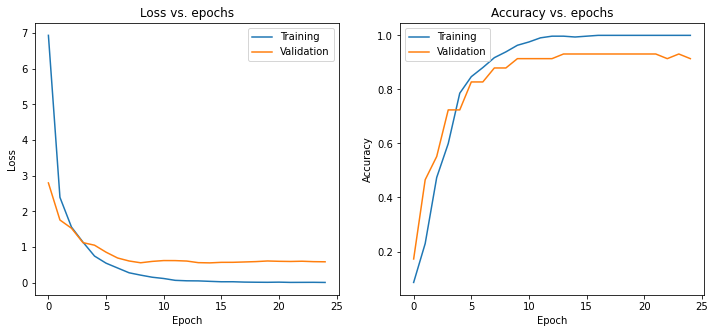

In [9]:
# Plot the metrics vs. epochs

plot_metrics(history)

In [10]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

6/6 [==============================] - 0s 4ms/step - loss: 0.2629 - accuracy: 0.9394
Test loss: 0.26289957761764526
Test accuracy: 0.939393937587738
